# 二值图像连通域标记

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import skimage as ski
import skimage.io as skio
import skimage.color as skcolor

In [90]:
src = skio.imread('../datas/f4.jpg')
gray = skcolor.rgb2gray(src) * 255
# _,binary = cv2.threshold(gray,120,255,cv2.THRESH_BINARY)
binary = np.zeros_like(gray)
idx = (gray > 160) & (gray <= 255)
binary[idx] = 255
binary = np.uint8(binary)
# binary = np.clip(binary,0,255)
# binary = np.uint8(binary)

In [138]:
def bwlabel(src):
    rows,cols = src.shape[0],src.shape[1]
#     print(rows,cols,src.dtype)
    imgclone = np.zeros((rows + 1,cols+1),dtype=src.dtype)
    imgclone[1:rows+1,1:cols+1] = src
#     print(imgclone.shape)
    imglabeled = np.zeros_like(imgclone)
    _,contours, hierarchy = cv2.findContours(imgclone,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
#     print(len(contours),len(hierarchy))
    contours_label = np.zeros(len(contours))
    num_label = 1
    # 标记外围轮廓
    for i in range(len(contours)):
        # 有Parent轮廓
        print(len(hierarchy[i]))
        if (hierarchy[i][3] >= 0).all():
            continue
        for k in range(len(contours[i])):
#             coord = np.array(contours[i][k])
#             print(coord.shape)
#             print(contours[i][k][0][1])
            imglabeled[contours[i][k][0][1],contours[i][k][0][0]] = num_label
        num_label += 1
        contours_label[i] = num_label
    # 标记内轮廓
    for i in range(len(contours)):
        if (hierarchy[i][3] < 0).all():
            continue
        for k in range(len(contours[i])):
#             coord = np.array(contours[i][k])
#             print(coord.shape)
            imglabeled[contours[i][k][0][1],contours[i][k][0][0]] = contours_label[hierarchy[i][3]]
    # 非轮廓像素的标记
    for i in range(0,rows+1):
        for j in range(1,cols+1):
            if imgclone[i,j] != 0 and imglabeled[i,j] == 0:
                imglabeled[i,j] = imglabeled[i,j-1]
    return imglabeled

In [139]:
imglabeled = bwlabel(binary)

605


IndexError: index 1 is out of bounds for axis 0 with size 1

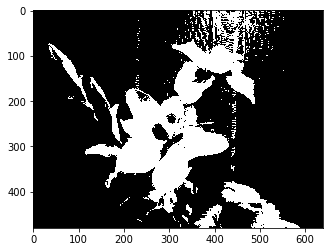

In [91]:
plt.figure()
plt.imshow(binary,'gray')
# plt.figure()
# plt.imshow(imglabeled,'gray')

In [92]:
print(gray)

[[107.148  107.148  107.148  ...  95.1348  96.279   97.5598]
 [112.148  111.0759 110.148  ...  95.1348  96.1348  97.1348]
 [112.148  111.148  111.0759 ...  96.279   96.279   98.1348]
 ...
 [ 72.      74.      75.     ... 112.2261 114.0857 113.2299]
 [ 72.      74.      77.     ... 113.2982 114.2299 113.2299]
 [ 84.      84.      83.     ... 111.727  112.2299 108.3741]]


In [ ]:
http://www.cnblogs.com/ronny/p/img_aly_01.html